12.6 (Word Frequency Bar Chart and Word Cloud from Shakespeare's Hamlet)
Using the techniques you learned in this chapter, create a top-20 word frequency bar chart and a word cloud, based on Shakespeare's Hamlet.

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
!pip install requests
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

In [3]:
from textblob import TextBlob
from operator import itemgetter
from nltk.corpus import stopwords
blob = TextBlob(data)
items = blob.word_counts.items()
stop_words = stopwords.words('english')
items = [item for item in items if item[0] not in stop_words]
top_twenty = sorted(items, key=itemgetter(1), reverse=True)[1:21]

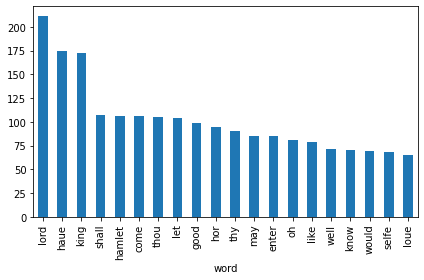

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame(top_twenty, columns=['word', 'count'])
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

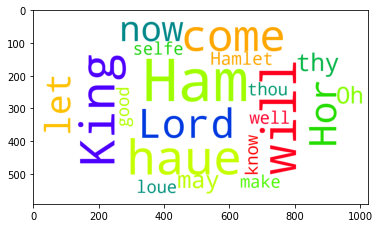

In [5]:
import imageio
from wordcloud import WordCloud
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white', max_words=20)
wordcloud.generate(data)
plt.imshow(wordcloud)